# Patient similarity networks (PSN)

A.L. 2022-10-26 (SageMath 9.7 / Ubuntu 20.04, MacOS Ventura)

See also: https://sagemanifolds.obspm.fr/install_ubuntu.html

Check sage installation and start a Jupyter notebook with the SageMath 9.6 kernel:

```
sage -c 'print(version())
sage -notebook
```

```
SageMath version 9.7, Release Date: 2022-09-19
```

Installing R-packages:
```
sage -R

> install.packages("lme4")
```

Installing Python packages (in the sage kernel):
```
> sage --pip install pandas
> sage --pip install seaborn
> sage --pip install networkx
> sage --pip install igraph
> # sage --pip install pycairo
> # sage --pip install cairocffi
> # sage --pip install leidenalg
> sage --pip install jupyterlab
```

## Introduction to graphs in Sage

See also: https://doc.sagemath.org/html/en/reference/graphs/index.html

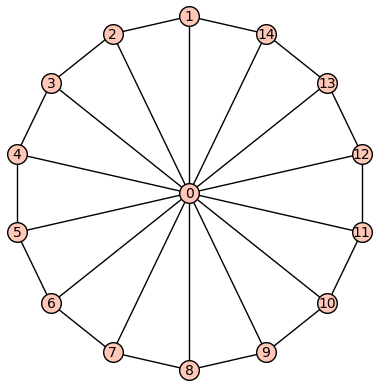

In [74]:
G = graphs.WheelGraph(15)
P = G.plot()
P.show()

/tmp/ipykernel_34246/725426538.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://trac.sagemath.org/27408 for details.
  for u,v,l in G.edges():


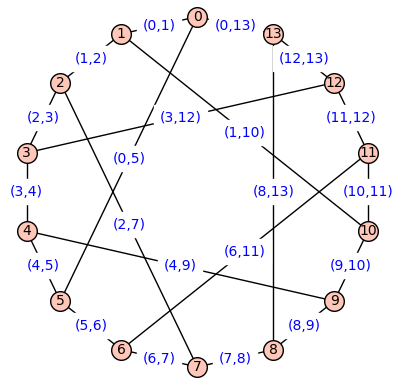

In [75]:
G = graphs.HeawoodGraph().copy(sparse=True)
for u,v,l in G.edges():
    G.set_edge_label(u,v,f"({str(u)},{str(v)})")   
G.graphplot(edge_labels=True).show()

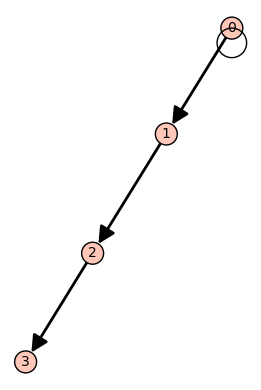

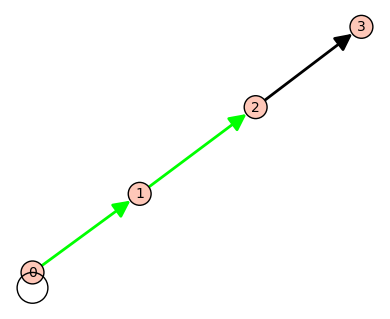

In [76]:
D = DiGraph({0:[0,1], 1:[2], 2:[3]}, loops=True)
D.show()
D.show(edge_colors={(0,1,0):[(0,1,None),(1,2,None)],(0,0,0):[(2,3,None)]})

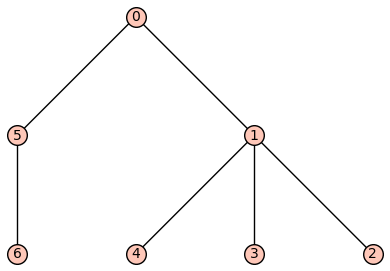

In [77]:
T = list(graphs.trees(7))
t = T[3]
t.graphplot(layout='tree').show()

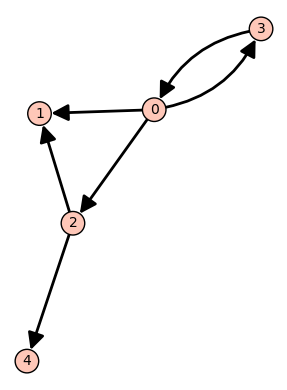

In [78]:
D = DiGraph({0:[1,2,3], 2:[1,4], 3:[0]})
D.graphplot().show()

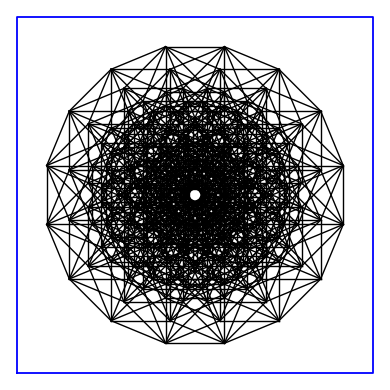

In [79]:
C = graphs.CubeGraph(8)
P = C.graphplot(vertex_labels=False, vertex_size=0, graph_border=True)
P.show()

## Adjacency matrix: 
In an adjacency matrix, each column and each row represent a
vertex. If a 1 shows up in row $i$, column $j$, there is an edge $(i,j)$.

In [80]:
M = Matrix([(0,1,0,0,1,1,0,0,0,0),(1,0,1,0,0,0,1,0,0,0), \
(0,1,0,1,0,0,0,1,0,0), (0,0,1,0,1,0,0,0,1,0),(1,0,0,1,0,0,0,0,0,1), \
(1,0,0,0,0,0,0,1,1,0), (0,1,0,0,0,0,0,0,1,1),(0,0,1,0,0,1,0,0,0,1), \
(0,0,0,1,0,1,1,0,0,0), (0,0,0,0,1,0,1,1,0,0)])

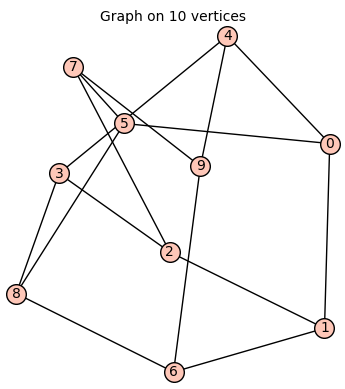

In [81]:
G = Graph(M); G

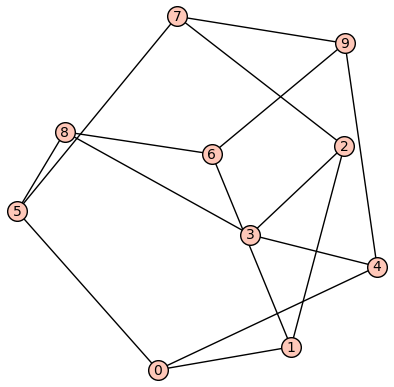

In [82]:
# Alternatively,

G.plot().show()    # or G.show()

## A list of edges:

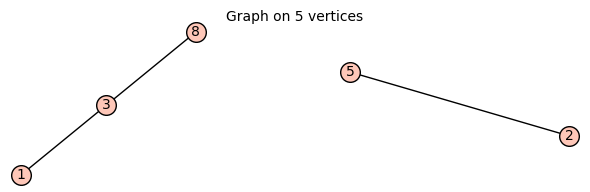

In [83]:
g = Graph([(1,3),(3,8),(5,2)])
g

## An `iGraph` graph

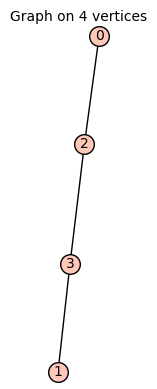

In [84]:
import igraph 

g = Graph(igraph.Graph([(1,3),(3,2),(0,2)]))
g

## A Petersen graph and node degree

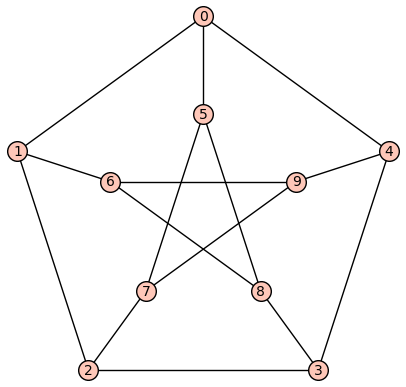

In [85]:
G = graphs.PetersenGraph()
G.plot().show() 

In [86]:
G.degree_histogram()

[0, 0, 0, 10]

In [87]:
G.adjacency_matrix()

[0 1 0 0 1 1 0 0 0 0]
[1 0 1 0 0 0 1 0 0 0]
[0 1 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 1 0]
[1 0 0 1 0 0 0 0 0 1]
[1 0 0 0 0 0 0 1 1 0]
[0 1 0 0 0 0 0 0 1 1]
[0 0 1 0 0 1 0 0 0 1]
[0 0 0 1 0 1 1 0 0 0]
[0 0 0 0 1 0 1 1 0 0]

In [88]:
G.vertices()

/tmp/ipykernel_34246/3606231782.py:1: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See http://trac.sagemath.org/22349 for details.
  G.vertices()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Plotting degree distribution

/tmp/ipykernel_34246/1777487699.py:6: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See http://trac.sagemath.org/22349 for details.
  degrees = [G.degree(n) for n in G.vertices()]  # G.nodes()]


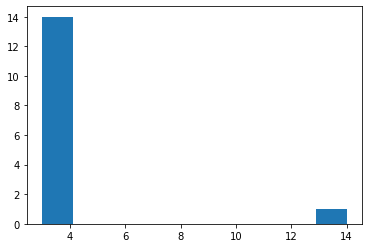

In [89]:
import numpy as np
import matplotlib.pyplot as plt


def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.vertices()]  # G.nodes()]
    #plt.hist(degrees)
    # or, plot pre-computed bins and counts using hist() by treating each bin 
    # as a single point with a weight equal to its count:
    counts, bins = np.histogram(degrees)
    plt.hist(bins[:-1], bins, weights=counts)
    plt.show()

# plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))
plot_degree_dist(graphs.WheelGraph(15))

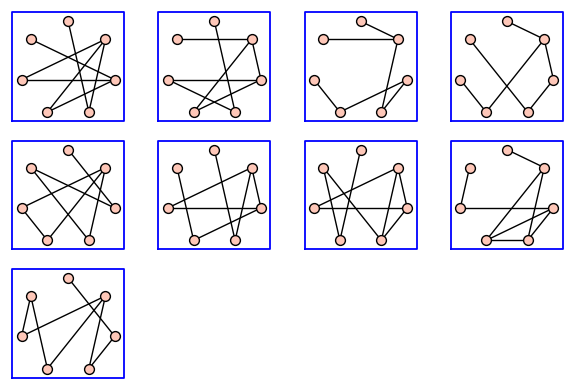

In [90]:
G = GraphQuery(display_cols=['graph6'], num_vertices=7, diameter=5)
L = G.get_graphs_list()
graphs_list.show_graphs(L)

There is a database available for searching for graphs that satisfy a certain set of parameters, including number of vertices and edges, density, maximum and minimum degree, diameter, radius, and connectivity. To see a list of all search parameter keywords broken down by their designated table names, type

In [91]:
graph_db_info()

{'graph_data': ['complement_graph6',
  'eulerian',
  'graph6',
  'lovasz_number',
  'num_cycles',
  'num_edges',
  'num_hamiltonian_cycles',
  'num_vertices',
  'perfect',
  'planar'],
 'aut_grp': ['aut_grp_size',
  'num_orbits',
  'num_fixed_points',
  'vertex_transitive',
  'edge_transitive'],
 'degrees': ['degree_sequence',
  'min_degree',
  'max_degree',
  'average_degree',
  'degrees_sd',
  'regular'],
 'misc': ['vertex_connectivity',
  'edge_connectivity',
  'num_components',
  'girth',
  'radius',
  'diameter',
  'clique_number',
  'independence_number',
  'num_cut_vertices',
  'min_vertex_cover_size',
  'num_spanning_trees',
  'induced_subgraphs'],
 'spectrum': ['spectrum',
  'min_eigenvalue',
  'max_eigenvalue',
  'eigenvalues_sd',
  'energy']}

## Visualization of graphs

To see a graph $G$  you are working with, there are three main options. You can view the graph in two dimensions via matplotlib with `show()`.

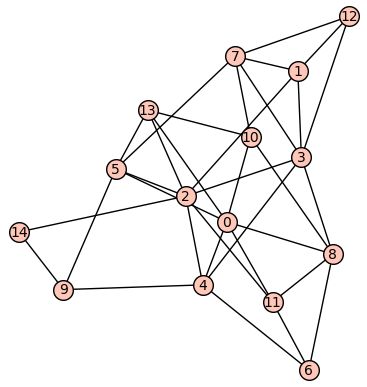

In [92]:
G = graphs.RandomGNP(15,.3)
G.show()

And you can view it in three dimensions via [jmol](https://jmol.sourceforge.net) with `show3d()`.

In [93]:
G.show3d()

Graphics3d Object

Or it can be rendered with $\LaTeX$. This requires the right additions to a standard LaTeX installation. Then standard Sage commands, such as view(G) will display the graph, or latex(G) will produce a string suitable for inclusion in a 
 document. More details on this are at the [sage.graphs.graph_latex](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_latex.html#module-sage.graphs.graph_latex) module.

In [94]:
from sage.graphs.graph_latex import check_tkz_graph
check_tkz_graph()  # random - depends on TeX installation
latex(G)

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

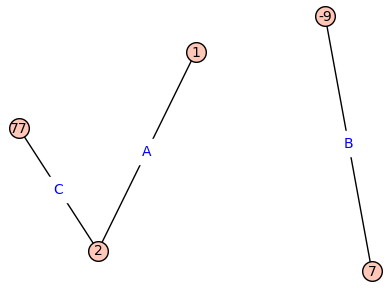

In [95]:
g = Graph([(1,2,"A"),(7,-9,"B"),(77,2, "C")])
g.graphplot(edge_labels=True).show()

In [96]:
g = igraph.Graph([(0,1),(0,2)], vertex_attrs={'name':['a','b','c']})
Graph(g).vertices(sort=True) 

['a', 'b', 'c']

In [97]:
g.degree("a")

2

In [98]:
color_dict = {"a": "red", "b": "green", "c": "blue"}
vertex_color=[color_dict[name] for name in g.vs["name"]]
vertex_color

['red', 'green', 'blue']

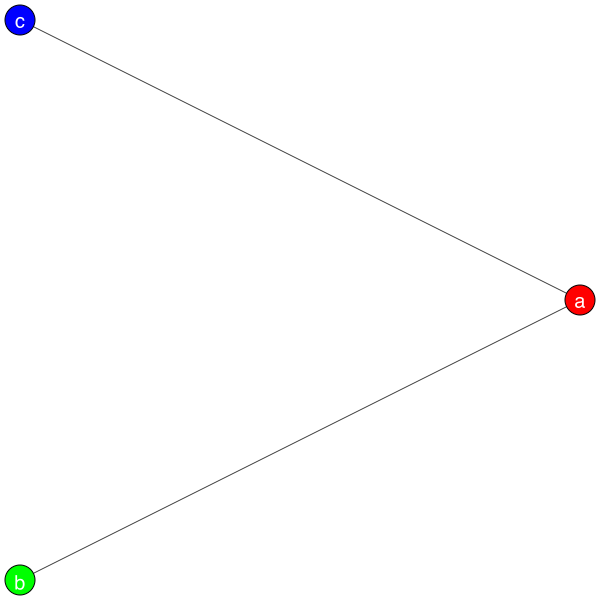

In [99]:
layout = g.layout_circle() # g.layout_random() # g.layout("kk")
igraph.plot(g, 
            layout=layout, 
            vertex_size = 30,
            vertex_color=vertex_color, 
            vertex_label=g.vs["name"], 
            vertex_label_color="white",
            vertex_label_size = 20)

In [100]:
g.vs.attribute_names()

['name']

In [101]:
g.vs["name"]

['a', 'b', 'c']

## Graphs in Python using NetworkX

In [102]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [103]:
# An adjacency matrix

A = np.array([
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

A

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [104]:
# Make a NetworkX graph from A

G = nx.from_numpy_array(A)

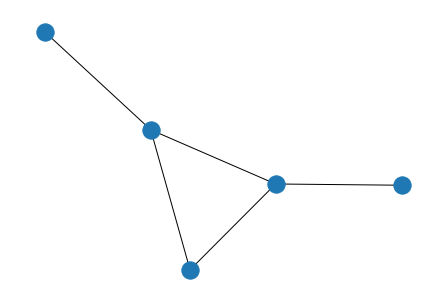

In [105]:
# DRaw the graph

nx.draw(G)

### Directedness and weightedness

We have two questions of network properties to consider when making a model:

- is the edges directed or undirected?
- are the edges (their values, or weights) continuous or binary?
For instance, the WWW is directed, but a social acquaintance does not follow a particular direction. We can use the `nx.DiGraph` class to force it to create a directed graph.

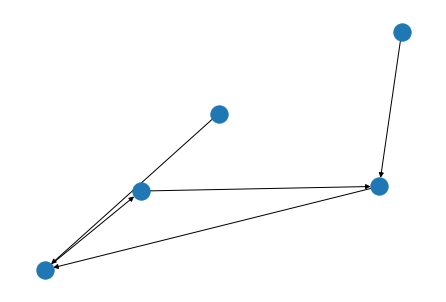

In [106]:
G_dir = nx.from_numpy_array(A, create_using=nx.DiGraph)
nx.draw(G_dir)

And we can just as easily transform it back into a numpy array:

In [107]:
M = nx.to_numpy_array(G_dir)
M

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [108]:
# being the same as expected:
M == A 

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

### A more elaborate example:

In [109]:
A = np.array([
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

A
G = nx.from_numpy_array(A)
node_labels = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

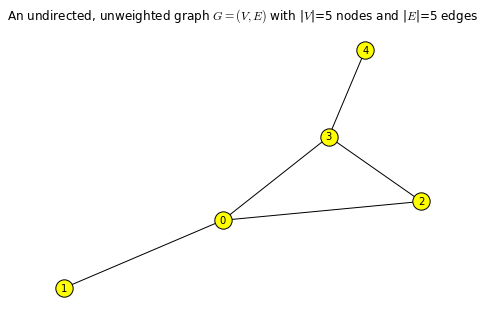

In [110]:
pos = nx.layout.spring_layout(G) # , seed=1)

nx.draw(G, pos=pos, labels=node_labels, node_color='yellow', font_size=10, font_color='k')
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000")  # Yellow circular nodes with black bundary
plt.title('An undirected, unweighted graph $G=(V,E)$ with |$V$|=5 nodes and |$E$|=5 edges')
plt.show()

### Degree centrality
The degree centrality for a node $v \in V$  is the fraction of nodes it is connected to.

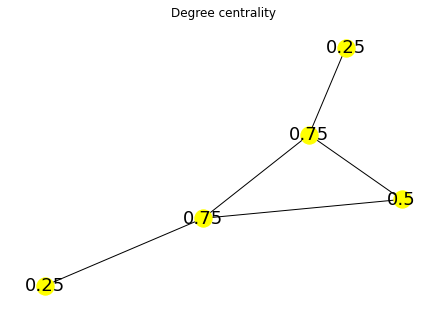

In [111]:
deg = nx.centrality.degree_centrality(G)
nx.draw(G, pos=pos, labels=deg, node_color='yellow', font_size=18, font_color='k')
plt.title('Degree centrality')
plt.show()

### Clustering coefficient
For unweighted graphs, the clustering of a node $u \in V$  is the fraction of possible triangles through that node that exist,
$$
c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},
$$

where $T(u)$  is the number of triangles through node $u$  and $deg(u)$ is the degree of $u$.

dict_values([0.3333333333333333, 0, 1.0, 0.3333333333333333, 0])


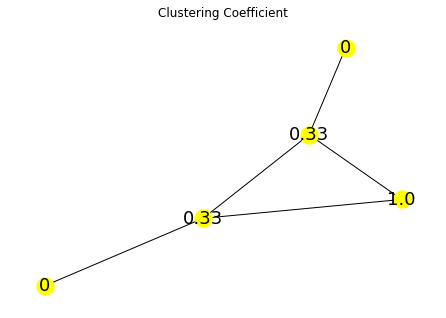

In [112]:
cc = nx.clustering(G)
print(cc.values())
for key, value in cc.items():
    newvalue = np.round(value, 2)
    cc[key] = newvalue
nx.draw(G, pos=pos, labels=cc, node_color='yellow', font_size=18, font_color='k')
plt.title('Clustering Coefficient')
plt.show()

## We will now be using medical data from the Pima indians diabetes database

Load, explore and prepare the data Let's repeat the procedure on another benchmark data set: Diabetes Data Set. You'll find a description of the data set together with a link to the data here:

- https://www.kaggle.com/uciml/pima-indians-diabetes-database. The data set is also available here:
- https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv.

In [113]:
url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

### We will use Pandas to inspect and process text data:

In [114]:
# Needed for MacOS
# cf. <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED]
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [115]:
diabetes = pd.read_csv(url)

In [116]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
diabetes.shape

(768, 9)

In [118]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [119]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Here's a description of each feature (from Kaggle):

- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

We can visualize the relation between the features in a scatter plot, where each sample is colored by whether it belongs to a diabetic persons or not:

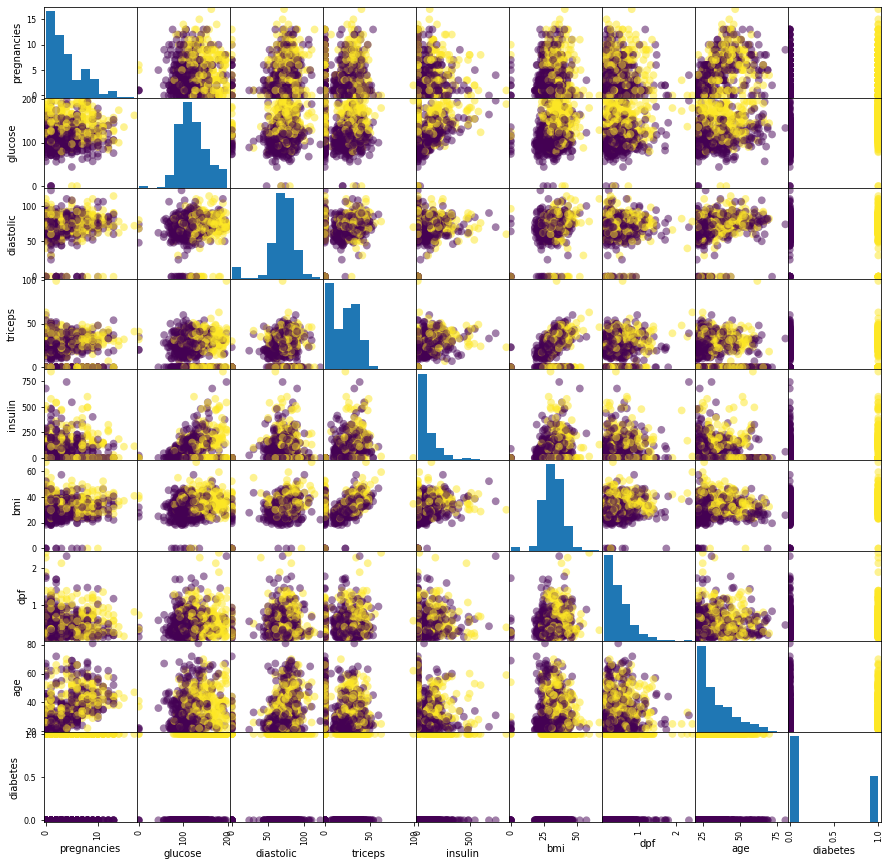

In [120]:
pd.plotting.scatter_matrix(diabetes, c=diabetes['diabetes'], figsize=(15,15), marker='o', s=60)
plt.show()

In [121]:
print(list(diabetes.columns))

['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age', 'diabetes']
